1.Import the dataset and explore basic info.


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/DELL/Downloads/Titanic-Dataset 2.csv")

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Get general info (data types, non-null counts)
print("\nDataset Info:")
print(df.info())

# Check for null values in each column
print("\nNull values in each column:")
print(df.isnull().sum())

First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

2.Handle missing values using mean/median/imputation.

In [6]:
# For numerical columns: fill with mean or median
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].mean(), inplace=True)  # Or use median: df['Age'].median()

if 'Fare' in df.columns:
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
# For categorical columns: fill with mode (most frequent)
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#Confirm no more missing values
print("Remaining null values after imputation:")
print(df.isnull().sum())

Remaining null values after imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


3.Convert categorical features into numerical using encoding 

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
# Drop columns that are likely not useful in modeling as-is
df = df.drop(columns=["Name", "Ticket", "Cabin"])

# Label Encoding for binary categorical feature
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

# One-Hot Encoding for 'Embarked' (nominal feature with more than 2 categories)
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

# Display the encoded dataframe
print(df.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    1  22.0      1      0   7.2500   
1            2         1       1    0  38.0      1      0  71.2833   
2            3         1       3    0  26.0      0      0   7.9250   
3            4         1       1    0  35.0      1      0  53.1000   
4            5         0       3    1  35.0      0      0   8.0500   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1  


4.Normalize/Standardize the numerical features

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [10]:
# Select numerical columns
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Drop rows with missing numerical data
df_cleaned = df.dropna(subset=numerical_cols)

# Standardize numerical features
scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Normalize the numerical features
normalizer = MinMaxScaler()
df_cleaned[numerical_cols] = normalizer.fit_transform(df_cleaned[numerical_cols])

# View the result
print(df_cleaned[numerical_cols].head())




        Age      Fare  SibSp  Parch
0  0.271174  0.014151  0.125    0.0
1  0.472229  0.139136  0.125    0.0
2  0.321438  0.015469  0.000    0.0
3  0.434531  0.103644  0.125    0.0
4  0.434531  0.015713  0.000    0.0


5.Visualize ouliers using boxplots and remove them

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

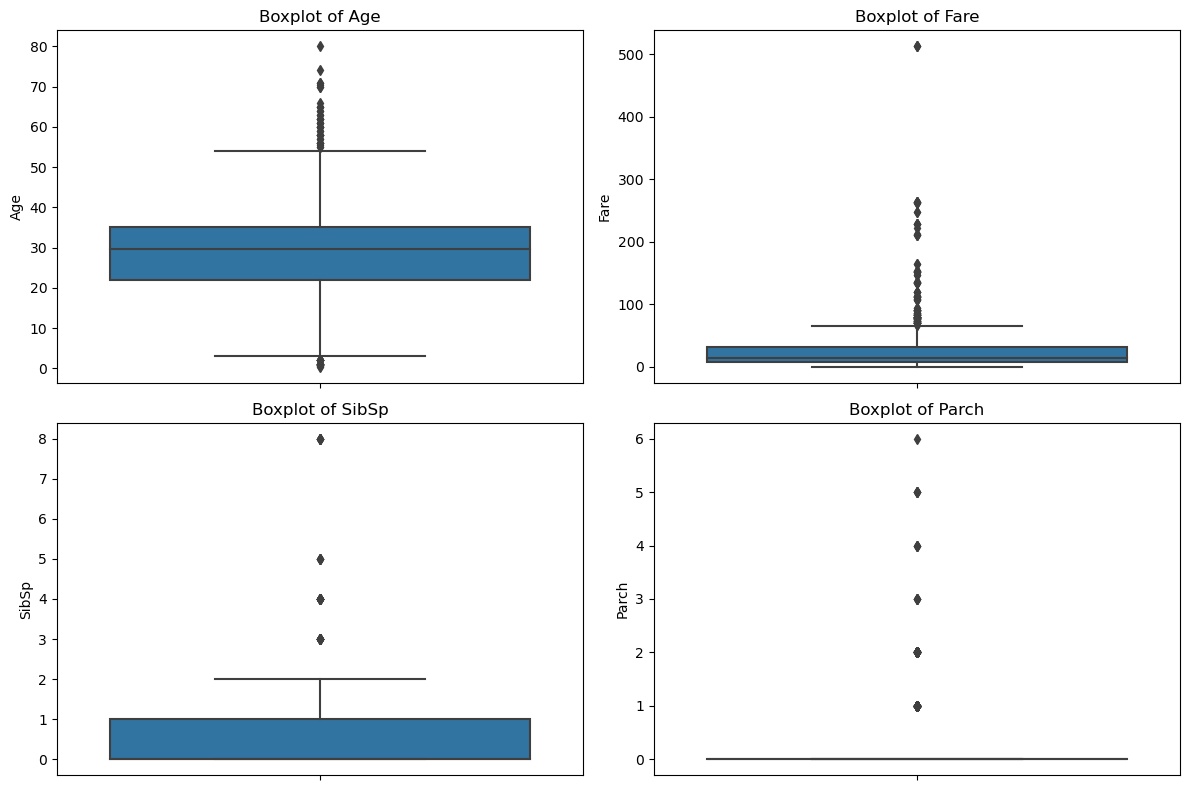

In [13]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()  # <-- this is the correct line
plt.show()

In [16]:
# Remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply outlier removal to each numerical column
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

# Check the cleaned dataset
print("Dataset shape after outlier removal:", df.shape)


Dataset shape after outlier removal: (577, 11)
